In [1]:
from analyser import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
p3_mock = Test("example.csv")

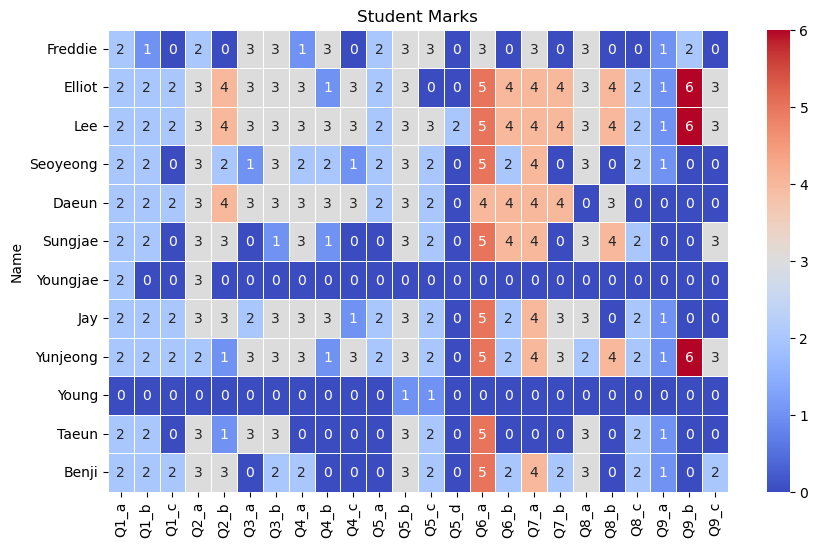

In [3]:
heatmap_data = p3_mock.mark_table.set_index("Name")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Student Marks")
plt.show()

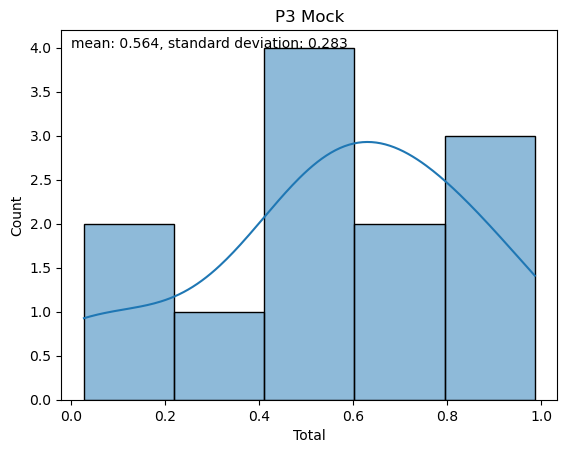

In [4]:
# Plotting the histogram for total marks
hist = sns.histplot(data=p3_mock.norm_total, x="Total", kde=True)
data = f"mean: %.3f, standard deviation: %.3f" % (
    np.mean(p3_mock.norm_total["Total"]),
    np.std(p3_mock.norm_total["Total"]),
)
hist.set_title("P3 Mock")
hist.annotate(data, (0, 4))
plt.savefig("Output/P3 Mock.png", dpi=300)

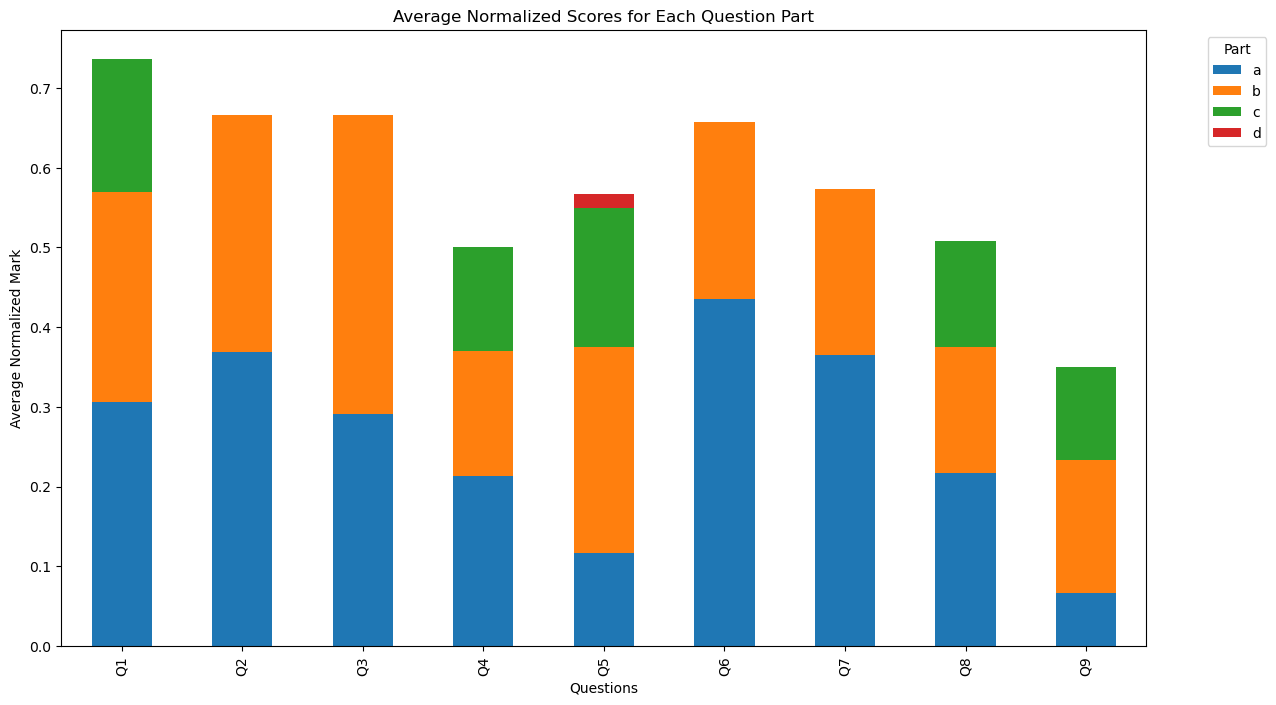

In [5]:
# Calculate the average normalized marks for each part of each question
df_avg = (
    p3_mock.marks(norm=True, to_one=True)
    .groupby(["Question", "Part"])["Mark"]
    .mean()
    .unstack()
    .fillna(0)
)
# Plotting the stacked bar plot
ax = df_avg.plot(kind="bar", stacked=True, figsize=(14, 8))
plt.title("Average Normalized Scores for Each Question Part")
plt.ylabel("Average Normalized Mark")
plt.xlabel("Questions")
plt.legend(title="Part", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("Output/P3 Mock per Q.png", dpi=300)
plt.show()

<Axes: xlabel='Question', ylabel='Mark'>

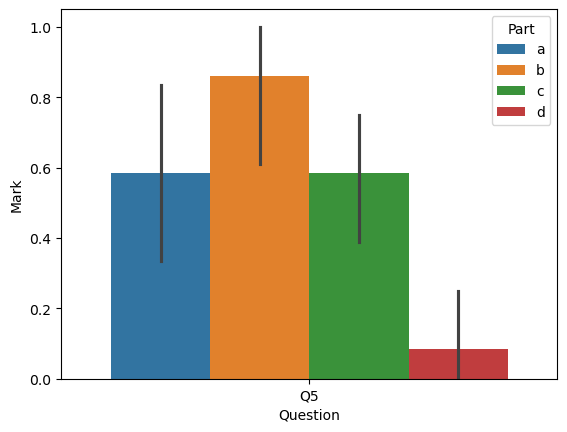

In [10]:
marks = p3_mock.marks(norm=True)
sns.barplot(data=marks[marks['Question'].str.contains('Q5')], x = 'Question', y = 'Mark', hue='Part')